In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Load Titanic dataset
df = sns.load_dataset('titanic')

In [10]:
# Basic info
print("Dataset Info:\n")
print(df.info())
print("\nHead:\n", df.head())
print("\nDescribe:\n", df.describe(include='all'))

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Head:
    survived  pclass     sex   age  sibsp  parch    

In [11]:
# Missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df)) * 100
print("\nMissing Values:\n", pd.DataFrame({'Missing Count': missing_values, 'Missing %': missing_percent}))


Missing Values:
              Missing Count  Missing %
deck                   688  77.216611
age                    177  19.865320
embarked                 2   0.224467
embark_town              2   0.224467
sex                      0   0.000000
pclass                   0   0.000000
survived                 0   0.000000
fare                     0   0.000000
parch                    0   0.000000
sibsp                    0   0.000000
class                    0   0.000000
adult_male               0   0.000000
who                      0   0.000000
alive                    0   0.000000
alone                    0   0.000000


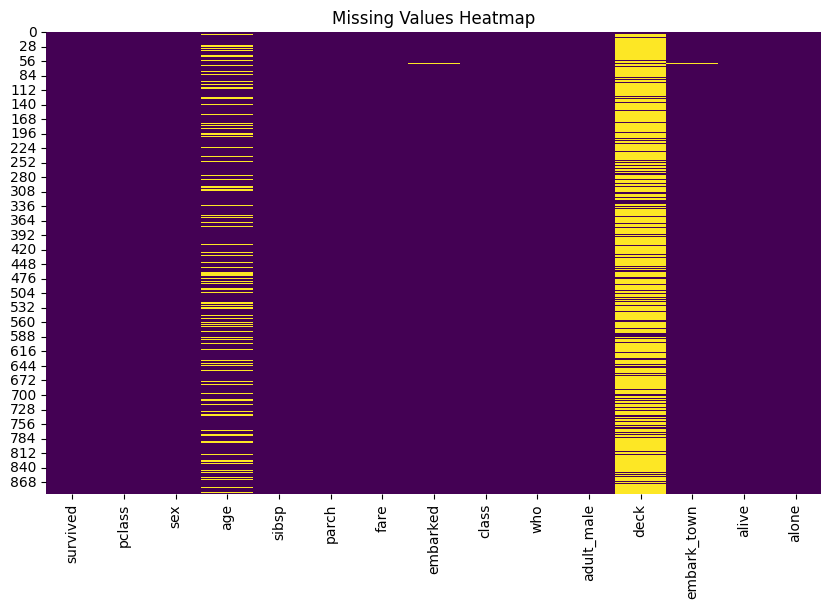

In [12]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [13]:

# Drop high-missing or irrelevant columns
df.drop(columns=['deck', 'embark_town','alive'], inplace=True)

# Encode categorical columns temporarily for imputation
label_cols = ['sex', 'embarked', 'class', 'who', 'adult_male', 'alone']
df_encoded = df.copy()

In [14]:


# Encode labels numerically
le_dict = {}
for col in label_cols:
    if col in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[col] = df_encoded[col].astype(str)
        df_encoded[col] = le.fit_transform(df_encoded[col])
        le_dict[col] = le

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed_array = imputer.fit_transform(df_encoded)

# Convert back to DataFrame
df_imputed = pd.DataFrame(df_imputed_array, columns=df_encoded.columns)

# Reverse encode (optional)
for col in label_cols:
    if col in df.columns:
        le = le_dict[col]
        df_imputed[col] = le.inverse_transform(df_imputed[col].round().astype(int))




In [15]:
# Visualize missing data (should be zero now)
print("Missing values after KNN imputation:")
print(df_imputed.isnull().sum())

Missing values after KNN imputation:
survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64


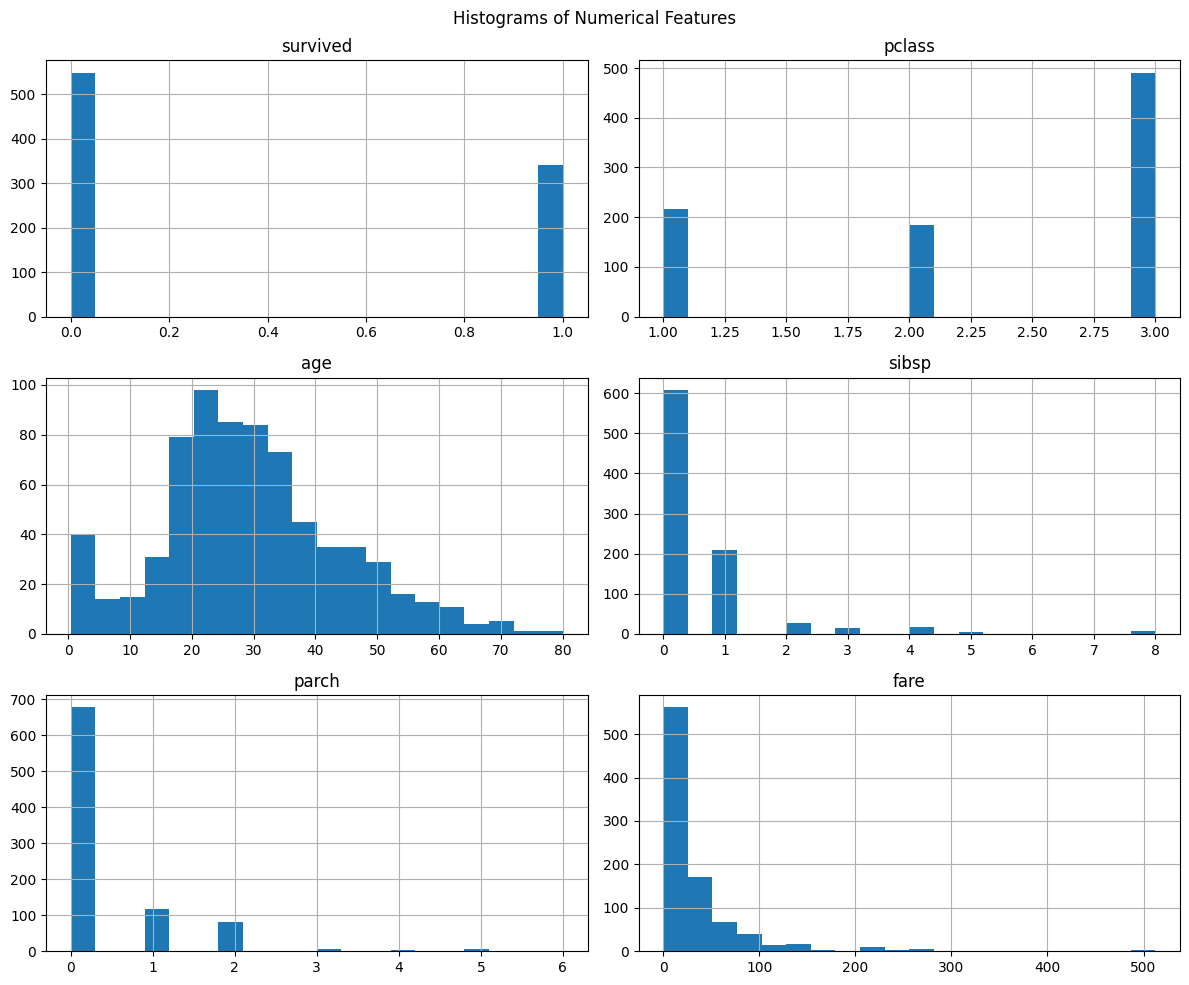

In [16]:
# Histograms of numerical features
df.select_dtypes(include=[np.number]).hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

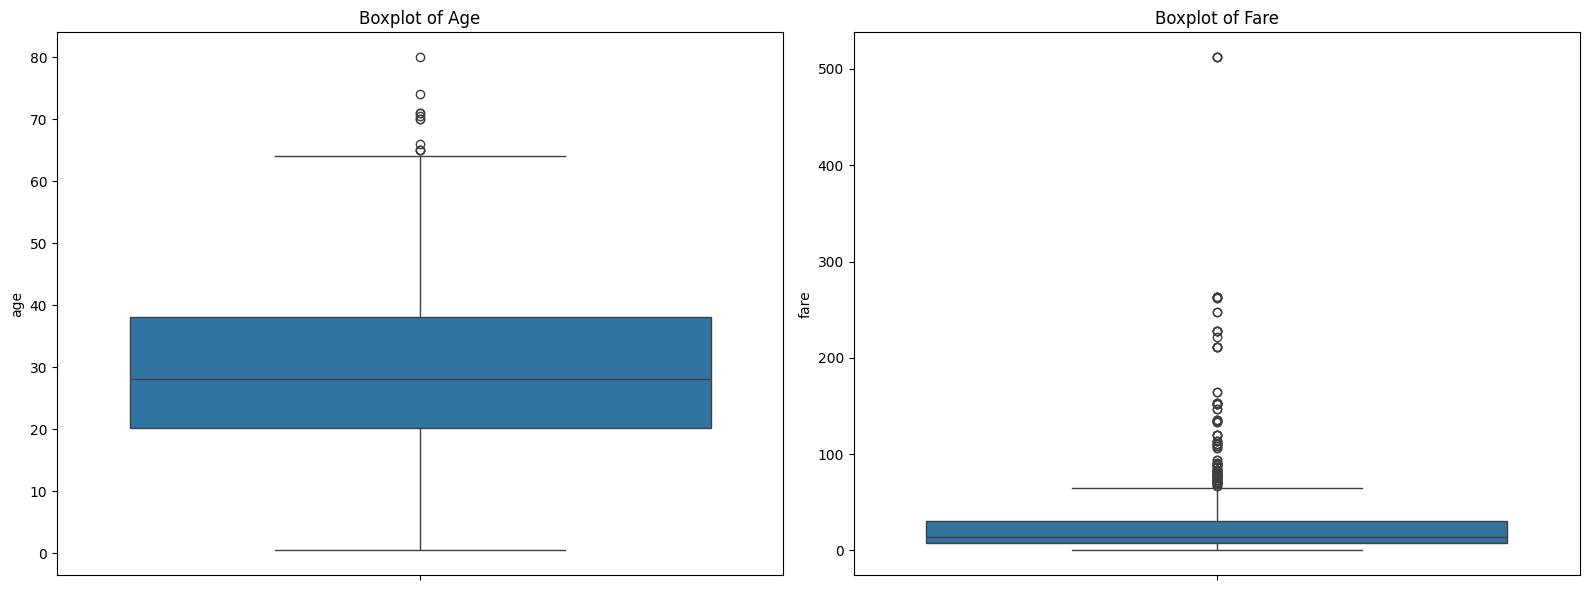

In [17]:
# Boxplots for outliers
plt.figure(figsize=(16, 6))
for i, col in enumerate(['age', 'fare']):
    plt.subplot(1, 2, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col.capitalize()}')
plt.tight_layout()
plt.show()


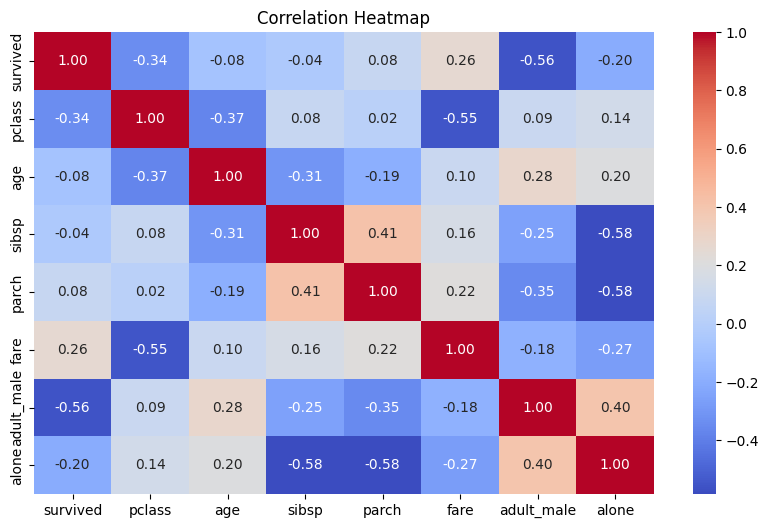

In [18]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

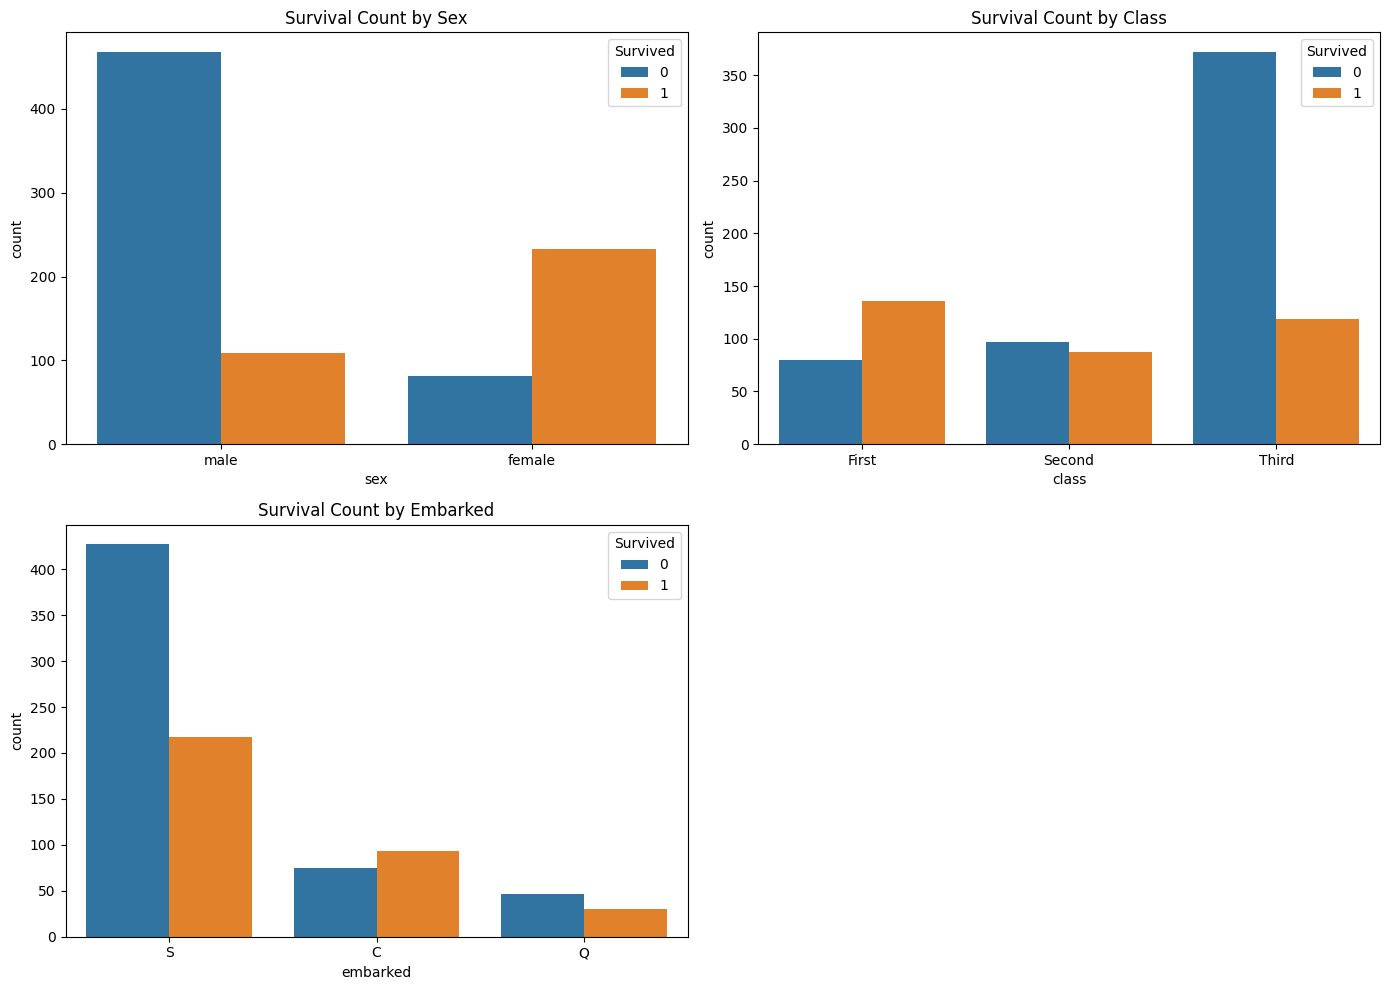

In [19]:
# Bar plots for categorical relationships
plt.figure(figsize=(14, 10))
for i, col in enumerate(['sex', 'class', 'embarked']):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df, x=col, hue='survived')
    plt.title(f'Survival Count by {col.capitalize()}')
    plt.legend(title='Survived', loc='upper right')
plt.tight_layout()
plt.show()

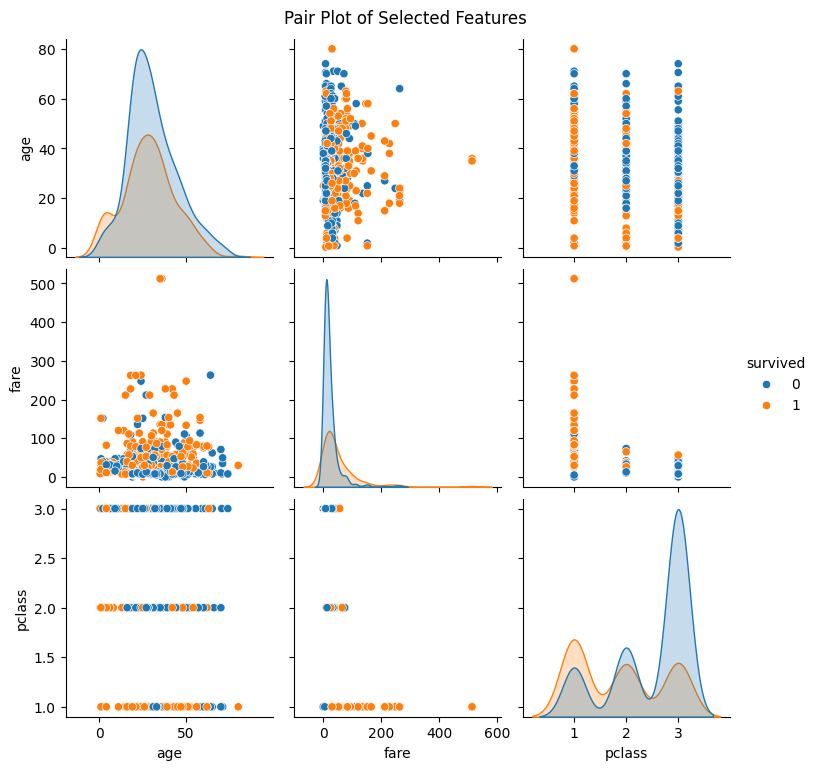

In [20]:
# Pair plot for numerical relationships
selected = df[['age', 'fare', 'pclass', 'survived']].dropna()
sns.pairplot(selected, hue='survived', diag_kind='kde')
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

